# We Rate Dogs Tweet Analysis 

In [2]:
import pandas as pd
import numpy as np 
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime

This document is a brief summary of ratings done by WeRateDogs, a twitter account that rates dogs proessionally. 

To start off lets get a statistical summary of the data and the numerical variables. It;s important to note that only official ratings were taken into account for this analysis, any retweets or replies were not taken into consideration. 

In [9]:
# Import Dataframe from Wrangling project
tweets.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1.883000e+03
mean,12.568773,10.499734,9134.133829,2774.637281,1.210834,0.597376,1.344226e-01,6.031185e-02
std,42.562836,7.010875,13088.984610,4876.332325,0.569924,0.271366,1.005755e-01,5.110918e-02
min,0.000000,2.000000,80.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2027.000000,607.500000,1.000000,0.367430,5.339800e-02,1.614795e-02
50%,11.000000,10.000000,4184.000000,1358.000000,1.000000,0.595665,1.175080e-01,4.923690e-02
75%,12.000000,10.000000,11491.000000,3168.500000,1.000000,0.848720,1.953115e-01,9.272610e-02
max,1776.000000,170.000000,164839.000000,84529.000000,4.000000,1.000000,4.676780e-01,2.734190e-01


The variable counts for rating numerator, retweets and favorites have greater means than medians. This suggests the distribution is skewed. A visualization of this distribution is provided below.

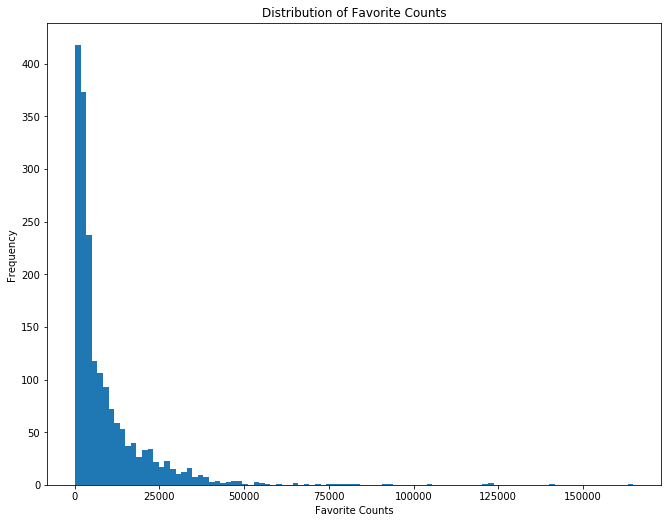

In [11]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweets.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
plt.show()

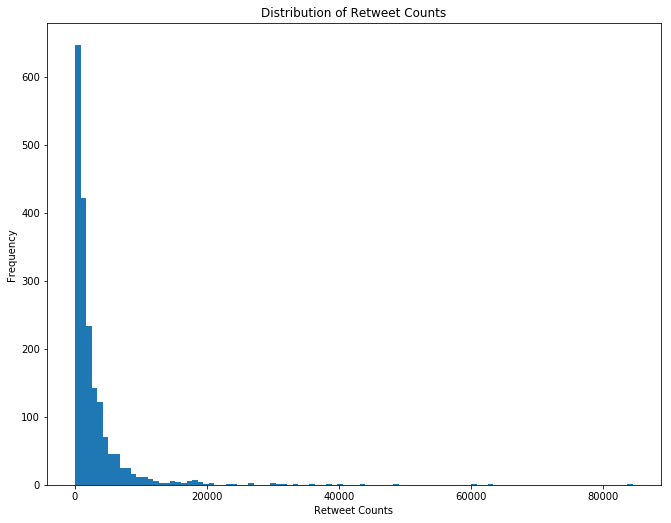

In [12]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweets.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency')
plt.show()

By doing a log transformation, to normalize any skew, we can observe the correlation between the two distributions. 
We would expect a pretty strong correlation. The log transformation is shown below.

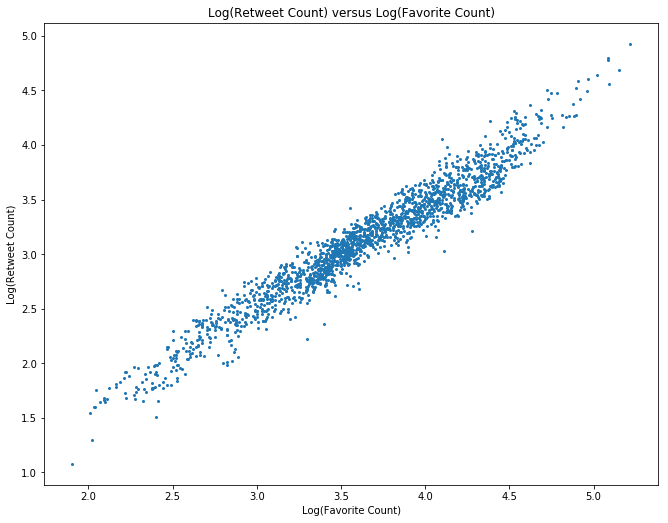

0.97068619815809598

In [14]:
%store -r df_logged
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_logged.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]

While a strong correlation is not surprising, 0.97 is remarkably high. It makes me wonder if the correlation is similar for all users or just the particular subset. 

WeRateDogs had a fairly unique rating system, ranking dogs out of 20. Because The vast majority of ratings were between 7 and 14, any rankings outside of this range was removed for expediency. A plot of the relationship between rating and favorite counts is shown below. 

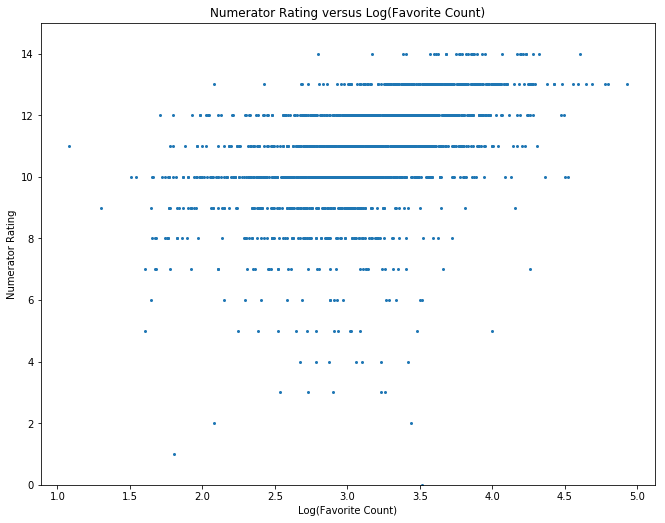

In [16]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.retweet_count, tweets.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,15)
plt.show()

This plot shows tweets with lower ratings have a tendancy to not recieve as many likes. This could be because many of the tweets with lower favorite counts were during  the early phase of @dog_rates. 

Lastly, let's take a look at how many tweets @dog_rates posted per month. 

Text(0,0.5,'Number of Tweets')

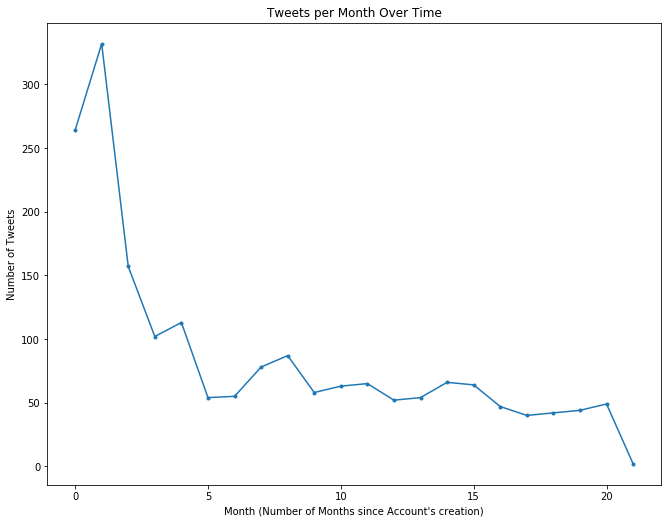

In [3]:
nmonth = list(range(22))
smonth = ['11/2015', '12/2015', '1/2016', '2/2016', '3/2016', '4/2016', ]
tweets_per_month=[264, 332, 157, 102, 113, 54, 55, 78, 87, 58, 63, 65, 52, 54, 66, 64, 47, 40, 42, 44, 49, 2]
plt.figure(1, figsize = (11, 8.5))
plt.plot(nmonth, tweets_per_month, marker= 'o', ms=3)
plt.title('Tweets per Month Over Time')
plt.xlabel('Month (Number of Months since Account\'s creation)')
plt.ylabel('Number of Tweets')

The graph clearly illustrate that @dog_rates post rate has declined significantly since it's creation. The slight dip at the end is less dramatic than it seeems, since the data for August only includes the first of the month. The increase around 7.5 months corrresponds with the summer months. Hinting the person running the twitter account was a student. 